Manuela Góez Estepa

# **Simbolos de Christoffel y Tensor de Einstein**

Para hacer estos cálculos, se usará una librería llamada *einsteinpy*, muy conveniente para hallar los tensores usados en relatividad.


In [ ]:
pip install einsteinpy >/dev/null

In [ ]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols, EinsteinTensor

sympy.init_printing()

In [ ]:
# se definen los simbolos que se usarán
r,thet,phi,t = sympy.symbols('r theta phi t')

syms2 = sympy.symbols('t r theta phi')

# para una métrica no estática, se asume que las funciones dependen de t y r
nu = sympy.Function('nu')(t,r)
lam = sympy.Function('lambda')(t,r)

# se define la métrica con simetría esférica
metric = sympy.diag(sympy.exp(nu),-sympy.exp(lam),-r**2,-r**2 * (sympy.sin(thet)**2)).tolist()

# Se crea el objeto:metrica
m_obj = MetricTensor(metric, syms2)
m_obj.tensor()

⎡ ν(t, r)                             ⎤
⎢ℯ             0       0        0     ⎥
⎢                                     ⎥
⎢            λ(t, r)                  ⎥
⎢   0      -ℯ          0        0     ⎥
⎢                                     ⎥
⎢                       2             ⎥
⎢   0          0      -r        0     ⎥
⎢                                     ⎥
⎢                            2    2   ⎥
⎣   0          0       0   -r ⋅sin (θ)⎦

In [ ]:
#Cálculo de los simbolos de christoffel
ch = ChristoffelSymbols.from_metric(m_obj)
ch.tensor().simplify()

⎡                                                     ⎡ -λ(t, r) + ν(t, r) ∂  
⎢⎡∂                     ∂                          ⎤  ⎢ℯ                  ⋅──(
⎢⎢──(ν(t, r))           ──(ν(t, r))                ⎥  ⎢                    ∂r 
⎢⎢∂t                    ∂r                         ⎥  ⎢───────────────────────
⎢⎢───────────           ───────────            0  0⎥  ⎢               2       
⎢⎢     2                     2                     ⎥  ⎢                       
⎢⎢                                                 ⎥  ⎢          ∂            
⎢⎢∂             λ(t, r) - ν(t, r) ∂                ⎥  ⎢          ──(λ(t, r))  
⎢⎢──(ν(t, r))  ℯ                 ⋅──(λ(t, r))      ⎥  ⎢          ∂t           
⎢⎢∂r                              ∂t               ⎥  ⎢          ───────────  
⎢⎢───────────  ──────────────────────────────  0  0⎥  ⎢               2       
⎢⎢     2                     2                     ⎥  ⎢                       
⎢⎢                                                 ⎥

In [ ]:
#cálculo del tensor de einstein con indices covariantes
einst = EinsteinTensor.from_metric(m_obj )
einst.tensor().simplify()

⎡    ⎛  ∂              λ(t, r)    ⎞  -λ(t, r) + ν(t, r)             ∂         
⎢1.0⋅⎜r⋅──(λ(t, r)) + ℯ        - 1⎟⋅ℯ                               ──(λ(t, r)
⎢    ⎝  ∂r                        ⎠                                 ∂t        
⎢──────────────────────────────────────────────────────             ──────────
⎢                           2                                            r    
⎢                          r                                                  
⎢                                                                             
⎢                     ∂                                      ⎛  ∂             
⎢                     ──(λ(t, r))                        1.0⋅⎜r⋅──(ν(t, r)) - 
⎢                     ∂t                                     ⎝  ∂r            
⎢                     ───────────                        ─────────────────────
⎢                          r                                              2   
⎢                                                   

# **Diagrama Penrose Minkowski**

Se hacen transformaciones, inicialmente una rotación:

$$v=t+r\\
w=t-r$$

luego se acotan los rangos del diagrama por medio de arcotangentes:

$$p= tan^{-1}v\\
q= tan^{-1}w$$

de donde se obtiene que:

$$p(q,r)= tan^{-1}(tan (q) +2r)\\
p(q,t)= tan^{-1}(2t-tan (q))$$

la última transformación es:

$$t'= p+q\\
r' =p-q$$

de donde se encuentran estas coordenadas primadas en términos del parámetro $q,r$ o $t$.

$$t'= tan^{-1}(tan (q) +2r)+q\\
r' =tan^{-1}(tan (q) +2r)-q$$

De las anteriores se puede obtener las curvas a r constantes y las siguientes a t constantes:

$$t'= tan^{-1}(2t-tan (q))+q\\
r' =tan^{-1}(2t-tan (q))-q$$


In [ ]:
q=np.linspace(-np.pi/2,np.pi/2,500)

In [ ]:
def tp_r(q,r):
  return np.arctan(np.tan(q)+2*r)+q

def rp_r(q,r):
  return np.arctan(np.tan(q)+2*r)-q

def tp_t(q,t):
  return np.arctan(2*t-np.tan(q))+q

def rp_t(q,t):
  return np.arctan(2*t-np.tan(q))-q

(Text(0.5, 0, "$r'$"), Text(0, 0.5, "$t'$"))

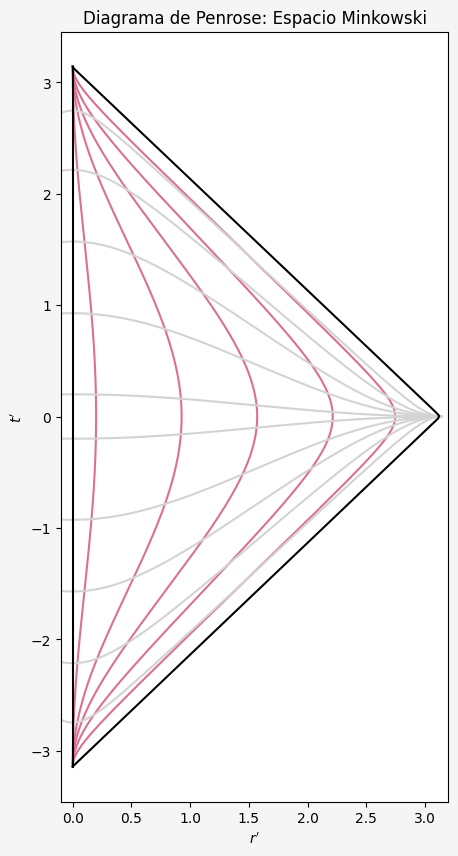

In [ ]:
r=np.array([0.1,0.5,1,2,5])
t=np.array([0.1,0.5,1,2,5,-0.1,-0.5,-1,-2,-5])

fig = plt.figure(figsize=(5,10),facecolor="whitesmoke")
plt.title("Diagrama de Penrose: Espacio Minkowski")

for i in range(len(r)):
  plt.plot(rp_r(q,r[i]),tp_r(q,r[i]),color = "palevioletred")

for i in range(len(t)):
  plt.plot(rp_t(q,t[i]),tp_t(q,t[i]),color="lightgray")

plt.plot(rp_r(q,0),tp_r(q,0),color="k")
plt.plot(rp_r(q,100),tp_r(q,100),color="k")
plt.xlim(-0.1,3.2)
plt.xlabel(r"$r'$"),plt.ylabel(r"$t'$")

Note que las lineas rojas corresponden a r constante y las grises a t constante. Así mismo la línea vertical es $r=0$ y la línea negra a modo de frontera es para un $r→∞$.

# **Diagrama Penrose Kruskal**

Se hacen transformaciones, inicialmente una rotación:

$$A=u+v\\
B=u-v$$

luego se acotan los rangos del diagrama por medio de arcotangentes:

\begin{align}
p&=tan^{-1}A\\
&=tan^{-1}(u+v)\\
q&= tan^{-1}B\\
&=tan^{-1}(u-v)
\end{align}

de donde se obtiene que:

$$p(q,v)= tan^{-1}(tan (q) +2v)\\
p(q,u)= tan^{-1}(2u-tan (q))$$

la última transformación es:

$$u'= p+q\\
v' =p-q$$

de donde se encuentran estas coordenadas primadas en términos del parámetro $q,r$ o $t$.

$$u'= tan^{-1}(tan (q) +2v)+q\\
v' =tan^{-1}(tan (q) +2v)-q$$

De las anteriores se puede obtener las curvas a r constantes y las siguientes a t constantes:

$$u'= tan^{-1}(2u-tan (q))+q\\
v' =tan^{-1}(2u-tan (q))-q$$

las expresiones para u y v se toman del Hobson:General Relativity. An introduction for physicists.


In [ ]:
m=1 #arbitrario

In [ ]:
#Hobson. Kruskal solution
def v(r,t):
  if r>2*m:
    return (r/(2*m)-1)**(1/2)*np.exp(r/(4*m))*np.sinh(t/(4*m))

  else:
    return (1-r/(2*m))**(1/2)*np.exp(r/(4*m))*np.cosh(t/(4*m))

def u(r,t):
  if r>2*m:
    return (r/(2*m)-1)**(1/2)*np.exp(r/(4*m))*np.cosh(t/(4*m))

  else:
    return (1-r/(2*m))**(1/2)*np.exp(r/(4*m))*np.sinh(t/(4*m))


(-1.2, 1.2)

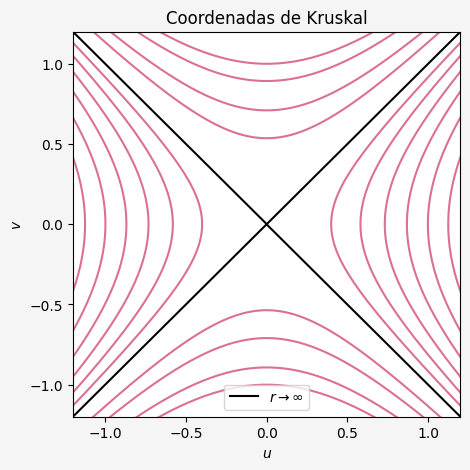

In [ ]:
t=np.linspace(-100,100,1000)
r1=np.linspace(2*m,3*m,10)
r2=np.linspace(-5*m,0*m,4)


fig = plt.figure(figsize=(5,5),facecolor="whitesmoke")
plt.title("Coordenadas de Kruskal")

#r en el infinito
plt.plot(u(-50*m,t),v(-50*m,t),color="k",label=r"$r\rightarrow \infty$")
plt.plot(-u(-50*m,t),-v(-50*m,t),color="k")

for ri in r1:
  plt.plot(u(ri,t),v(ri,t),color="palevioletred")
  plt.plot(-u(ri,t),-v(ri,t),color="palevioletred")

for ri in r2:
  plt.plot(u(ri,t),v(ri,t),color="palevioletred")
  plt.plot(-u(ri,t),-v(ri,t),color="palevioletred")


plt.xlabel(r"$u$"),plt.ylabel(r"$v$")
plt.legend()
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)

In [ ]:
def q(u,v):
  return np.arctan(u-v)

In [ ]:
def up_v(q,v):
  return np.arctan(np.tan(q)+2*v)+q

def vp_v(q,v):
  return np.arctan(np.tan(q)+2*v)-q

def up_u(q,u):
  return np.arctan(2*u-np.tan(q))+q

def vp_u(q,u):
  return np.arctan(2*u-np.tan(q))-q

(Text(0.5, 0, "$u'$"), Text(0, 0.5, "$v'$"))

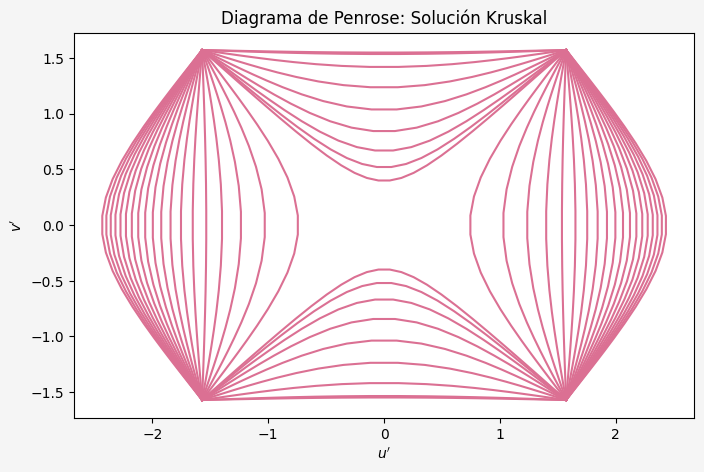

In [ ]:
fig = plt.figure(figsize=(8,5),facecolor="whitesmoke")
plt.title("Diagrama de Penrose: Solución Kruskal")

t=np.linspace(-50*m,50*m,100)
r1=np.linspace(-10*m,2*m,10)
r2=np.linspace(2*m,4*m,20)

for ri in r1:
  u1=u(ri,t);v1=v(ri,t)
  plt.plot(up_v(q(u1,v1),v1),vp_v(q(u1,v1),v1),color="palevioletred")
  plt.plot(-up_v(q(u1,v1),v1),-vp_v(q(u1,v1),v1),color="palevioletred")

for ri in r2:
  u1=u(ri,t);v1=v(ri,t)
  plt.plot(up_v(q(u1,v1),v1),vp_v(q(u1,v1),v1),color="palevioletred")
  plt.plot(-up_v(q(u1,v1),v1),-vp_v(q(u1,v1),v1),color="palevioletred")

plt.xlabel(r"$u'$"),plt.ylabel(r"$v'$")